<a href="https://colab.research.google.com/github/pellurupooja/Salary_prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Salary Prediction<h1>**

PROBLEM: GIVEN A DATASET WHICH CAPTURE GROSS SALARY FROM JULY 2013 THROUGH JUN, 2014 AND INCLUDES ONLY THOSE EMPLOYEES WHO WERE EMPLOYED ON JUNE, 2014. PREDICT SALARIES FOR EMPLOYEES IN BLATIMORE.

<h2>OUTLINE</h2>
1. IMPORT DATASET<br>
2. DATA CLENING AND DATA PREPARATION<br>
3. EXPLORATORY DATA ANALYSIS<br>
4. FEATURE ENGINEERING<br>
5. TRAIN TEST SPLIT<br>
6. MODEL BUILDING <br>
7. MODEL EVALUATION<br>

In [ ]:
# IMPORT LIBRARIES FOR ANALYSIS
import numpy as np
import pandas as pd

# IMPORT LIBRARIES FOR VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT LIBRARY FOR TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# IMPORT LIBRARY FOR SCALING
from sklearn.preprocessing import StandardScaler

# IMPORT LIBRARY FOR MODEL BUILDING
from sklearn.linear_model import LinearRegression

# SUPRESS WARNINGS
import warnings
warnings.filterwarnings('ignore')

**IMPORTING THE DATASET**

The datast is in csv format and can be imported using read_csv method available in pandas library.

In [ ]:
salary = pd.read_csv('trainfile.csv')

In [ ]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


DATA CLEANING AND PREPARATION

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 18981 rows in the dataset.<br>
There are 7 columns in the dataset.<br>
All columns are of type object.<br>

In [ ]:
salary_cpy = salary.copy()

In [ ]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [ ]:
# Since name has leading space, it is removed.
salary_cpy.columns = salary_cpy.columns.str.strip()

In [ ]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
# checking null values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
salary_cpy = salary_cpy.dropna(subset=['HireDate'])

In [ ]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# dropping gross pay columns
salary_cpy = salary_cpy.drop('GrossPay', axis= 1)

In [ ]:
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [ ]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02669      1
W02696      1
W02099      1
W02685      1
W02658      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies om Blatimore. AgencyID represent Agency, so same agencies as well. But after validating it seems one agency is having multiple agency IDs.

In [ ]:
# value_counts for agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
M-R Labor Commissioner         6
HLTH-Health Dept Locatio       6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

In [ ]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
FISCAL OFFICER                       1
CHIEF HORTICULTURIST                 1
LEGISLATIVE FISCAL ANALYST           1
TRANSPORTATION SAFETY SUPERVIS       1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [ ]:
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
03/14/1983       1
06/06/2001       1
08/14/1989       1
08/30/1989       1
06/08/2002       1
Name: HireDate, Length: 4737, dtype: int64

Removing $ from annual salary and converting it into float

In [ ]:
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x: (int)(str(x[3:5])))
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x: (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x: (int)(str(x[6:])))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [ ]:
# trimming all categorical columns- no leading and trailing spaces and no double spaces are between words
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x: str(x).strip().replace("  "," "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x: str(x).strip().replace("  "," "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x: str(x).strip().replace("  "," "))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [ ]:
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x: str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x: str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x: str(x).upper())

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


Checking for outliers

In [ ]:
salary_cpy.shape

(18911, 9)

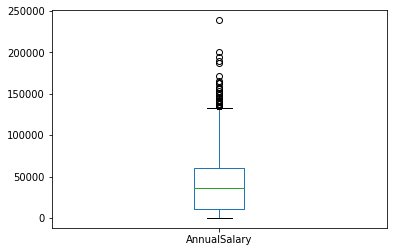

In [ ]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [ ]:
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

Delete rows whose annual salary > 140000 according to box plot

In [ ]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<140000]

In [ ]:
salary_cpy.shape

(18885, 9)

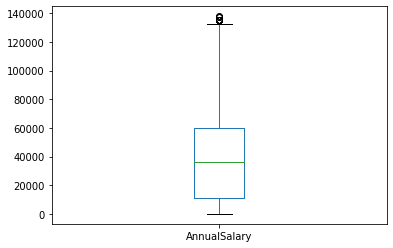

In [ ]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

EXPLORATORY DATA ANALYSIS

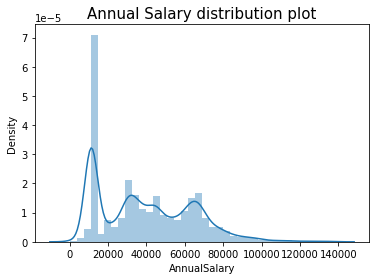

In [ ]:
# checking the distribution of annual salary by creating the distplot
sns.distplot(salary_cpy.AnnualSalary)
plt.title('Annual Salary distribution plot', fontsize = 15)
plt.show()

The data is distributed very randomly and there seems to be not many people with salary more than 100000

Jobs for which people are hired the most. By using a barplot.

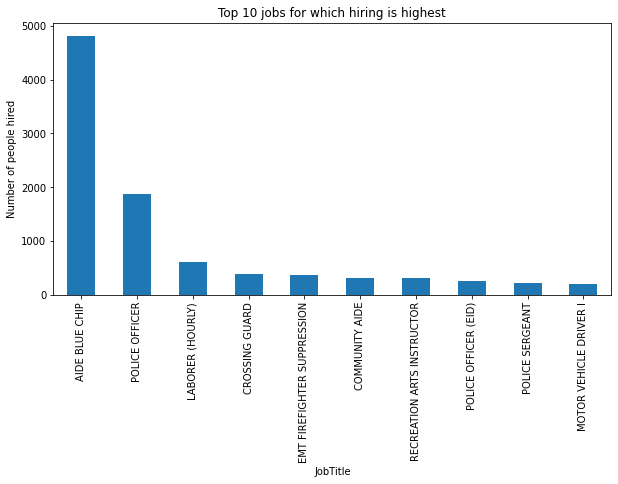

In [ ]:
plt.figure(figsize= (10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending= False).head(10).plot.bar()
plt.ylabel('Number of people hired')
plt.title('Top 10 jobs for which hiring is highest')
plt.show()

This plot shows more number of people were hired for aide blue chip followed by job of police officer. Other than these all other job titles have less than 1000 workers.

Checking top 10 jobs that fetch highest salary

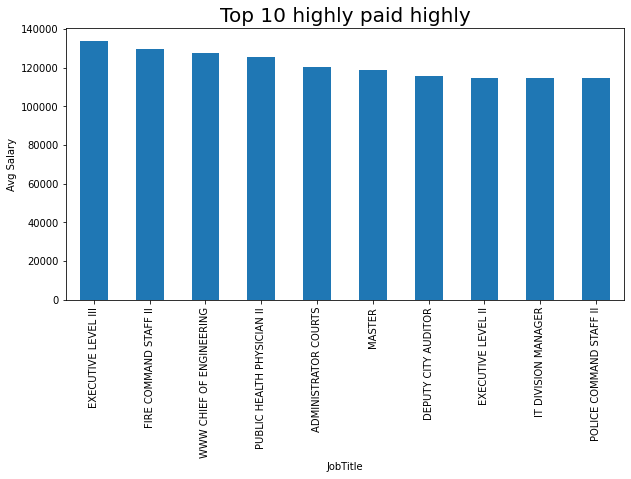

In [ ]:
plt.figure(figsize= (10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending= False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title('Top 10 highly paid highly', fontsize=20)
plt.show()

Number of jobs whose average pay is more than total average salary

In [ ]:
# find mean salary
mean_sal = salary_cpy.AnnualSalary.mean()

#number od jobs paying more than mean salary
good_paying_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

797

In [ ]:
good_paying_jobs

,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1049,ZONING ADMINISTRATOR,82100.000000
1050,ZONING APPEALS ADVISOR BMZA,59274.000000
1051,ZONING ENFORCEMENT OFFICER,62000.000000
1052,ZONING EXAMINER I,43674.000000


Top 10 agency and agentid with highest number of employees

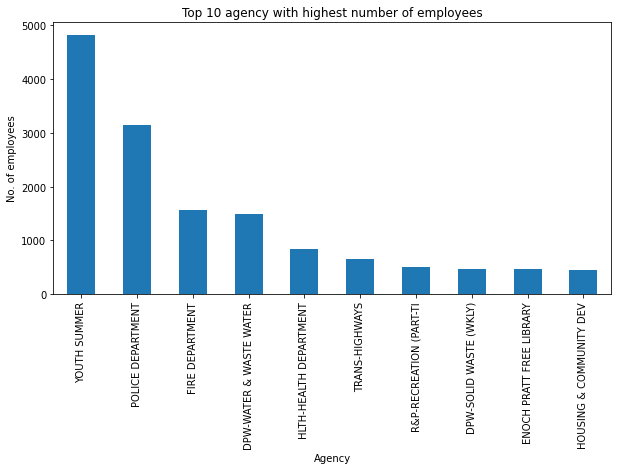

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No. of employees')
plt.title('Top 10 agency with highest number of employees')
plt.show()

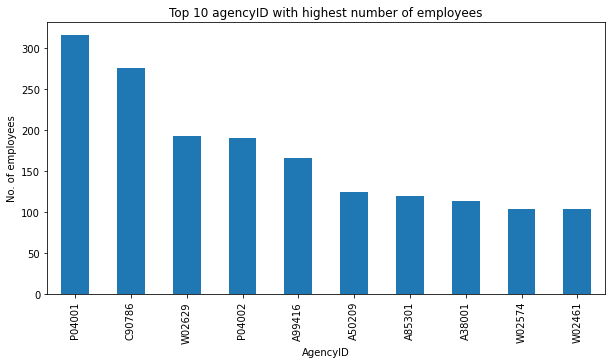

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No. of employees')
plt.title('Top 10 agencyID with highest number of employees')
plt.show()

Checking people hired in which year have lowest salaries. And to check relation between hire year and salary, as higher experience should have higher salary.

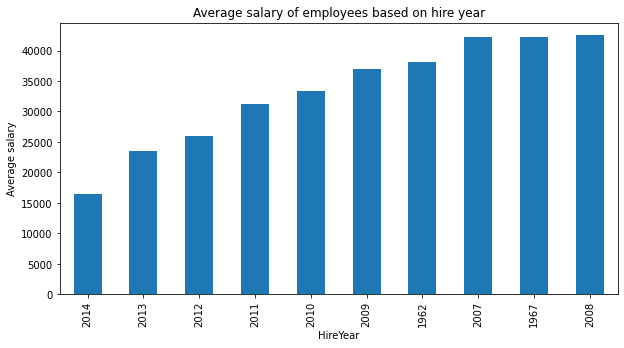

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('Average salary')
plt.title('Average salary of employees based on hire year')
plt.show()

The trend above suggests that the salary of the employees increases with experience in the company. So, calculating experience in days with Agency.

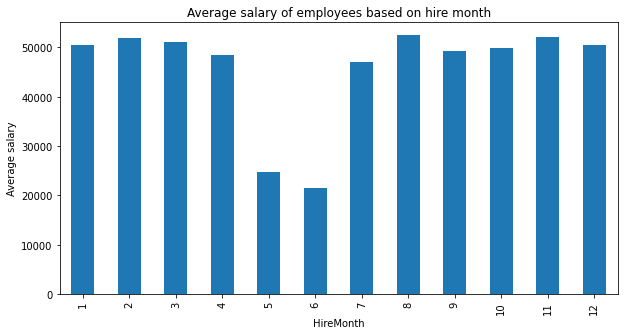

In [ ]:
# checking if month has any such effect
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average salary')
plt.title('Average salary of employees based on hire month')
plt.show()

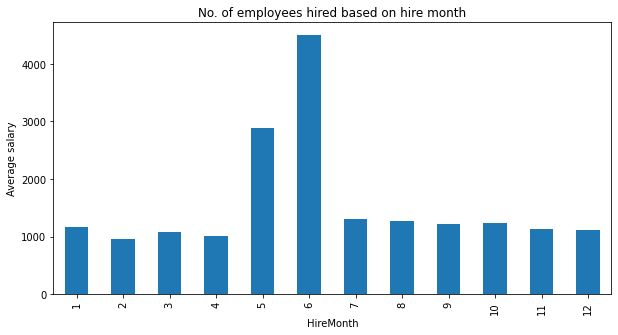

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('Average salary')
plt.title('No. of employees hired based on hire month')
plt.show()

More employees are hired in the month of may and june but they have relatively lower average salaries.

<Figure size 1080x1440 with 0 Axes>

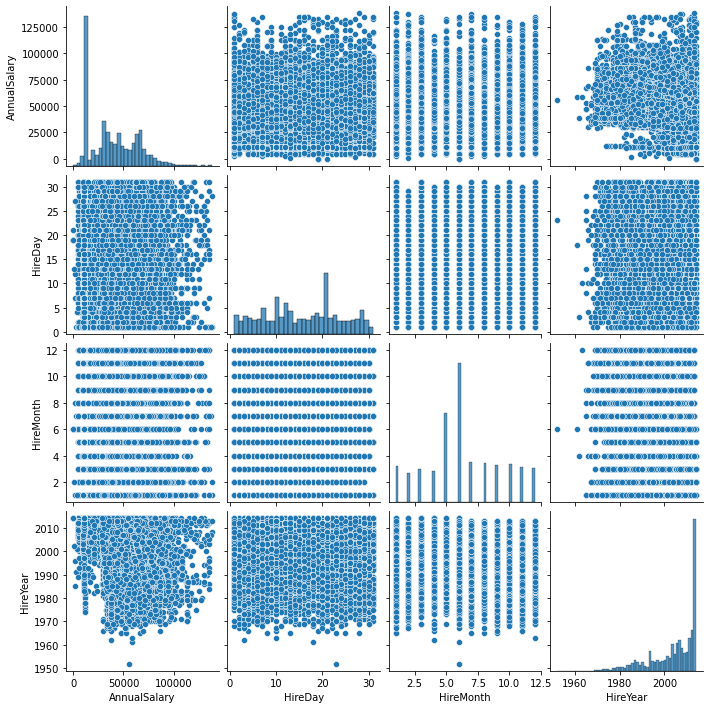

In [ ]:
# checking if there is any relation between any of the numerical variable using pairplot
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

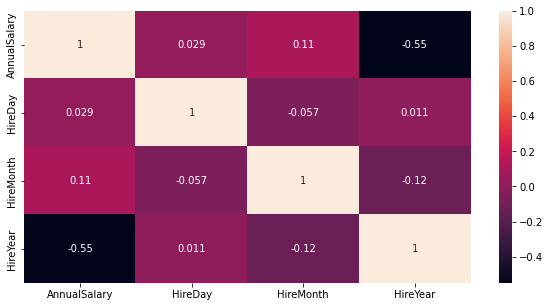

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(), annot=True)
plt.show()

**FEATURE ENGINEERING**

In [ ]:
# CREATING A COPY OF THE DATAFRAME
salary_master = salary_cpy.copy()

applying mean encoding

In [ ]:
mean_job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [ ]:
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)
salary_master['Agency']

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [ ]:
mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [ ]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
# drop Name and HireDate column
salary_master = salary_master.drop(['HireDate','Name'], axis=1)

In [ ]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


TRAIN- TEST SPLIT

In [ ]:
# SPLIT DATA INTO TRAIN AND TEST USING TRAIN-TEST SPLIT
salary_train, salary_test = train_test_split(salary_master, train_size = 0.7, random_state = 10)

In [ ]:
salary_train.shape

(13219, 7)

In [ ]:
salary_test.shape

(5666, 7)

In [ ]:
# dividing train set into dependent and independent variables
y_train = salary_train.pop('AnnualSalary')
x_train = salary_train

# dividing test set into dependent and independent variables
y_test = salary_test.pop('AnnualSalary')
x_test = salary_test

In [ ]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11313.967200,16,6,2014
15366,11313.967200,11310.000000,11313.967200,10,6,2013
3237,11313.967200,11310.000000,11313.967200,11,6,2009
16659,11313.967200,11310.000000,11313.967200,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11313.967200,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


**FEATURE SCALING**

In [ ]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

In [ ]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,-0.739384,-0.813601,-0.382481,1.220063,-1.143251,0.282241
7529,-1.162446,-1.272054,-1.345816,0.026686,-0.124696,0.955021
15366,-1.162446,-1.272054,-1.345816,-0.689340,-0.124696,0.858910
3237,-1.162446,-1.272054,-1.345816,-0.570003,-0.124696,0.474464
16659,-1.162446,-1.272054,-1.345816,0.384699,-0.124696,0.955021
...,...,...,...,...,...,...
9453,-1.162446,-1.272054,-1.345816,0.623375,-0.464215,0.955021
7371,-0.394744,-0.259730,-0.377713,-1.405367,-1.143251,-0.198316
17822,-0.222637,-0.056356,-0.382481,1.339401,-0.464215,-0.486650
7373,0.114649,1.044104,1.105307,-1.166691,1.233377,-3.369991


In [ ]:
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

In [ ]:
x_test

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
9797,0.871212,0.960094,1.051861,1.340110,0.549432,0.374341
4541,-1.163184,-1.267142,-1.344440,0.625637,-0.465372,0.953483
2860,-1.163184,-1.267142,-1.344440,1.459188,-0.127104,0.856960
8139,1.335218,1.374789,1.500812,0.268400,0.549432,0.374341
2876,0.033694,0.192605,0.024878,0.387479,0.211164,0.760436
...,...,...,...,...,...,...
11213,0.335475,0.495910,0.403834,0.506558,-0.127104,0.856960
3366,1.288703,1.583918,1.172630,1.697346,0.887700,0.856960
11606,0.485825,1.057566,0.606458,-1.279624,0.211164,-2.521373
14382,1.132004,1.285470,1.500812,0.506558,-1.141908,0.181293


**MODEL BUILDING**

BUILDING LINEAR REGRESSION MODEL

In [ ]:
lr = LinearRegression()
salary_reg = lr.fit(x_train, y_train)

In [ ]:
salary_reg.score(x_train, y_train) # how good model performs on training data

0.9652498067695455

In [ ]:
salary_reg.score(x_test, y_test) # how good model performs on test data

0.9647181159099966

In [ ]:
print("Coefficient: ",salary_reg.coef_)
print("Intercept: ", salary_reg.intercept_)

Coefficient:  [22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
Intercept:  39505.76539904681


In [ ]:
y_pred = salary_reg.predict(x_test)

In [ ]:
y_pred

array([58753.65393119, 10473.55438818, 10575.79726306, ...,
       57568.54532912, 65333.00342629, 11179.25048703])

In [ ]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64

Out of all the features agencyid, jobtitle and hireyear are the major driver for explaining variance in annual salary because they have higher coefficient value. Other than first two features all other features are negatively coerrelated with annual salary.